# Today we will compute the manifolds of the L1 and L2 Lagrange points in the Sun/Jupiter System

## We will be using the ThreeBodyProblem and DifferentialEquations packages

In [1]:
using ThreeBodyProblem

In [9]:
using DifferentialEquations

┌ Info: Precompiling DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
└ @ Base loading.jl:1278
ERROR: LoadError: Failed to precompile BoundaryValueDiffEq [764a87c0-6b3e-53db-9096-fe964310641d] to /home/jared711/.julia/compiled/v1.5/BoundaryValueDiffEq/Levrg_d3cMu.ji.
Stacktrace:
 [1] error(::String) at ./error.jl:33
 [2] compilecache(::Base.PkgId, ::String) at ./loading.jl:1290
 [3] _require(::Base.PkgId) at ./loading.jl:1030
 [4] require(::Base.PkgId) at ./loading.jl:928
 [5] require(::Module, ::Symbol) at ./loading.jl:923
 [6] include(::Function, ::Module, ::String) at ./Base.jl:380
 [7] include(::Module, ::String) at ./Base.jl:368
 [8] top-level scope at none:2
 [9] eval at ./boot.jl:331 [inlined]
 [10] eval(::Expr) at ./client.jl:467
 [11] top-level scope at ./none:3
in expression starting at /home/jared711/.julia/packages/DifferentialEquations/fpohE/src/DifferentialEquations.jl:12


LoadError: Failed to precompile DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa] to /home/jared711/.julia/compiled/v1.5/DifferentialEquations/UQdwS_d3cMu.ji.

In [3]:
using Plots

# The first step is to define the system. ThreeBodyProblem.jl has built-in functions for common systems like Sun/Jupiter.

In [4]:
PRIM, SEC, SYS = sun_jupiter()

(Body(1.98847e30, 695700.0, 0.0, 0.0, "Sun", :yellow), Body(1.898187e27, 69911.0, 7.782799587829314e8, 3.74355659124e8, "Jupiter", :red), System(Body(1.98847e30, 695700.0, 0.0, 0.0, "Sun", :yellow), Body(1.898187e27, 69911.0, 7.782799587829314e8, 3.74355659124e8, "Jupiter", :red), 1.3271645321e11, 1.26690694941e8, 0.000953686364361088, 7.782799587829314e8, 695700.0, 69911.0, 3.74355659124e8, 7.782799587829314e8, 5.958055362400919e7, 13.06265067112951, "Sun/Jupiter"))

## There's even a recipe to plot the system for us!

In [5]:
plot(SYS)

LoadError: type System has no field PRIM

## We can see the Lagrange Points, but where are the Sun and Jupiter? Turns out that the distance between them is so much larger than the radius of either one that it makes it impossible to see them on a true scaled picture. Let's scale the Sun and Jupiter to make them visible.

In [6]:
plot(SYS, scaled = true)

LoadError: type System has no field PRIM

## That's better! Now let's compute the L1 and L2 Lagrange points of our system

In [7]:
L1, L2 = computeLpts(SYS)
# Declare state vectors for L1 and L2 (with zero velocity)
rv1 = [L1; zeros(3)] # state at Lagrange point L1
rv2 = [L2; zeros(3)]; # state at Lagrange point L2

## We perturb our states in the +x, -x, +y,and -y directions

In [267]:
pert = 1e-6

rv1x₊ = rv1 + [pert,0,0,0,0,0]
rv1x₋ = rv1 - [pert,0,0,0,0,0]

rv1y₊ = rv1 + [0,pert,0,0,0,0]
rv1y₋ = rv1 - [0,pert,0,0,0,0]

rv2x₊ = rv2 + [pert,0,0,0,0,0]
rv2x₋ = rv2 - [pert,0,0,0,0,0]

rv2y₊ = rv2 + [0,pert,0,0,0,0]
rv2y₋ = rv2 - [0,pert,0,0,0,0];

## Next, we integrate our initial conditions forward in time for the +x and -x directions and backward in time for the +y and -y directions

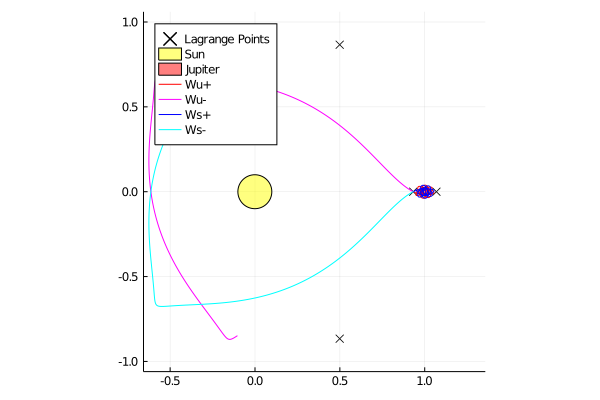

In [269]:
# Integrate trajectories for 2 Jupiter periods
tf = 2*2π
tspan_forward = (0.,tf) # make sure to add decimal points so tspan contains floating point values, not integers
tspan_back = (0.,-tf)
myreltol = 1e-12

# Set up the ODE Problems
prob1x₊ = ODEProblem(CR3BPdynamics!,rv1x₊,tspan_forward,SYS) # Unstable positive
prob1x₋ = ODEProblem(CR3BPdynamics!,rv1x₋,tspan_forward,SYS) # Unstable negative
prob1y₊ = ODEProblem(CR3BPdynamics!,rv1y₊,tspan_back,SYS) # Stable positive
prob1y₋ = ODEProblem(CR3BPdynamics!,rv1y₋,tspan_back,SYS) # Stable negative

# Solutions to the ODEs
sol1x₊ = solve(prob1x₊, reltol=myreltol)
sol1x₋ = solve(prob1x₋, reltol=myreltol)
sol1y₊ = solve(prob1y₊, reltol=myreltol)
sol1y₋ = solve(prob1y₋, reltol=myreltol)

plot(SYS,scaled=true)
plot!(sol1x₊,vars=(1,2),label="Wu+",linecolor=:red)
plot!(sol1x₋,vars=(1,2),label="Wu-",linecolor=:magenta)
plot!(sol1y₊,vars=(1,2),label="Ws+",linecolor=:blue)
plot!(sol1y₋,vars=(1,2),label="Ws-",linecolor=:cyan)
plot!(aspect_ratio=1,ylims=[-1,1],xlims=[-0.6,1.3],legend=:topleft,flip=false)

## We can see two strands moving in towards the sun, but the rest is a jumbled mess. Let's zoom in to see what's going on. Also, I need to make sure things are scaled correctly, or Jupiter will look way too big.

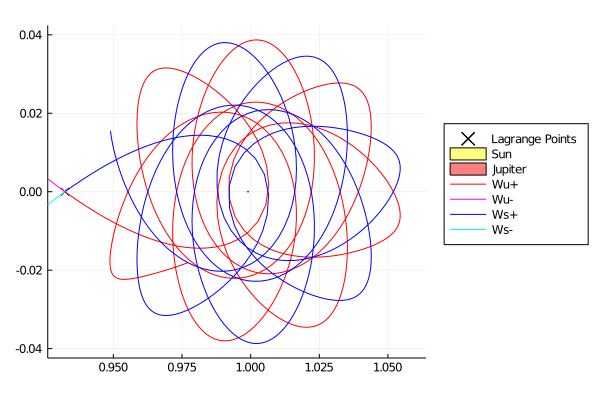

In [270]:
plot(SYS)
plot!(sol1x₊,vars=(1,2),label="Wu+",linecolor=:red)
plot!(sol1x₋,vars=(1,2),label="Wu-",linecolor=:magenta)
plot!(sol1y₊,vars=(1,2),label="Ws+",linecolor=:blue)
plot!(sol1y₋,vars=(1,2),label="Ws-",linecolor=:cyan)
plot!(aspect_ratio=1,ylims=[-0.04,0.04],xlims=[0.93,1.06],legend=:outerright,flip=false)

## Now we look at the L2 point manifolds

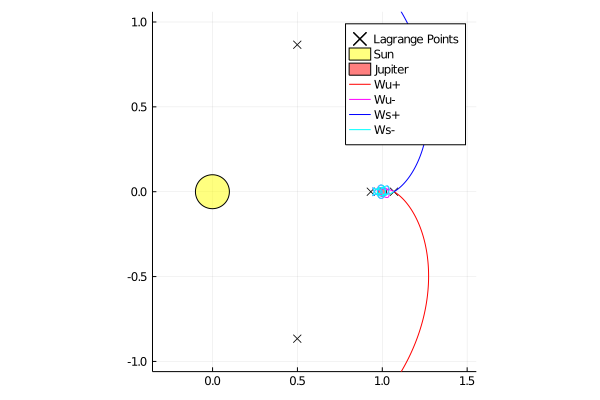

In [271]:
prob2x₊ = ODEProblem(CR3BPdynamics!,rv2x₊,tspan_forward,SYS) # Unstable positive
prob2x₋ = ODEProblem(CR3BPdynamics!,rv2x₋,tspan_forward,SYS) # Unstable negative
prob2y₊ = ODEProblem(CR3BPdynamics!,rv2y₊,tspan_back,SYS) # Stable positive
prob2y₋ = ODEProblem(CR3BPdynamics!,rv2y₋,tspan_back,SYS) # Stable negative

sol2x₊ = solve(prob2x₊, reltol=1e-6)
sol2x₋ = solve(prob2x₋, reltol=1e-6)
sol2y₊ = solve(prob2y₊, reltol=1e-6)
sol2y₋ = solve(prob2y₋, reltol=1e-6)

plot(SYS, scaled=true)
plot!(sol2x₊,vars=(1,2),label="Wu+",linecolor=:red)
plot!(sol2x₋,vars=(1,2),label="Wu-",linecolor=:magenta)
plot!(sol2y₊,vars=(1,2),label="Ws+",linecolor=:blue)
plot!(sol2y₋,vars=(1,2),label="Ws-",linecolor=:cyan)
plot!(aspect_ratio=1,ylims=[-1.0,1.0],xlims=[-0.3,1.5],legend=:topright,flip=false)

## This time there are two strands moving out away from the Sun, along with another jumble around Jupiter. Let's zoom in again to take a look.

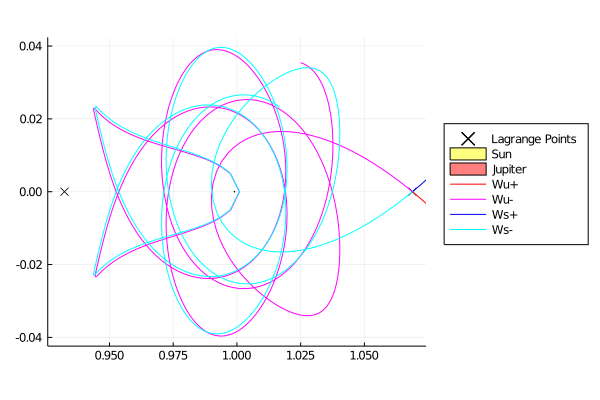

In [272]:
plot(SYS)
plot!(sol2x₊,vars=(1,2),label="Wu+",linecolor=:red)
plot!(sol2x₋,vars=(1,2),label="Wu-",linecolor=:magenta)
plot!(sol2y₊,vars=(1,2),label="Ws+",linecolor=:blue)
plot!(sol2y₋,vars=(1,2),label="Ws-",linecolor=:cyan)
plot!(aspect_ratio=1,ylims=[-0.04,0.04],xlims=[0.93,1.07],legend=:outerright,flip=false)